In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [2]:
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.6,random_state=42)
X = np.vstack([X, np.random.uniform(low=-10, high=10, size=(20,
2))])

In [3]:
X = StandardScaler().fit_transform(X)
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)
outliers = X[labels == -1]

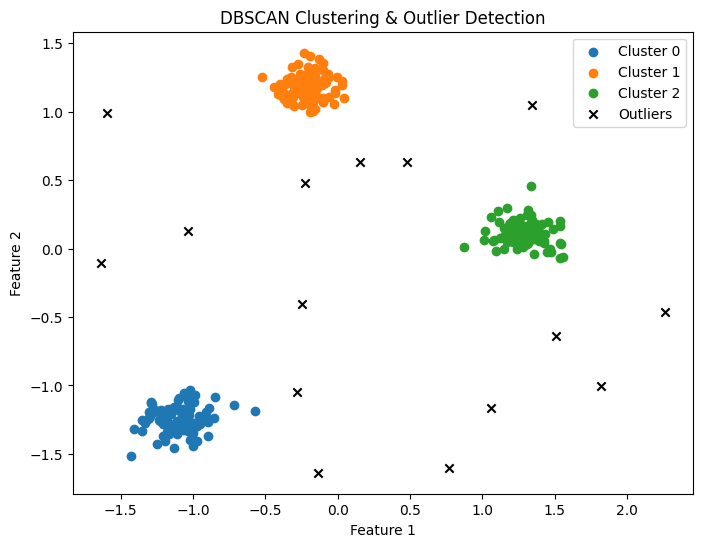

In [4]:
plt.figure(figsize=(8,6))
unique_labels = set(labels)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for label in unique_labels:
    if label == -1:
        # Outliers in black
        plt.scatter(outliers[:, 0], outliers[:, 1], c='black', marker='x', label='Outliers') # Indented this line
    else:
        plt.scatter(X[labels == label, 0], X[labels == label, 1],label=f'Cluster {label}')
plt.legend()
plt.title("DBSCAN Clustering & Outlier Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()